# stacked_staggered_barchart.ipynb

## Purpose:
Produce a barchart that is stacked and staggered.

## Author:
Benjamin S. Grandey, 2017

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string

%matplotlib inline

## Prepare data

In [2]:
# Create some data
data = np.arange(1, 11) + np.random.uniform(-0.5, 0.5, size=10)
np.random.shuffle(data)
# And some y-error values
error = np.random.uniform(0, 3, size=10)
# And store in a Pandas dataframe
df = pd.DataFrame({'data': data, 'error': error, 'label': list(string.ascii_uppercase[0:10])})
df

,data,error,label
0,10.157909,0.492387,A
1,9.092042,1.946255,B
2,7.124303,0.316907,C
3,0.581868,0.875951,D
4,3.679855,2.736821,E
5,1.588964,2.296694,F
6,5.505097,1.805860,G
7,2.710824,0.012920,H
8,4.950556,1.238819,I
9,8.054888,2.496359,J


In [3]:
# Sort data by size
df = df.sort_values(by='data', ascending=False)
df

,data,error,label
0,10.157909,0.492387,A
1,9.092042,1.946255,B
9,8.054888,2.496359,J
2,7.124303,0.316907,C
6,5.505097,1.805860,G
8,4.950556,1.238819,I
4,3.679855,2.736821,E
7,2.710824,0.012920,H
5,1.588964,2.296694,F
3,0.581868,0.875951,D


In [4]:
# Calculate sum of data and combined standard error
data_sum = df['data'].sum()
combined_error = np.sqrt((df['error']**2).sum())
# Add to end of dataframe, with a gap before it
df = df.append({'data': np.nan, 'error': np.nan, 'label': ''}, ignore_index=True)
df = df.append({'data': data_sum, 'error': combined_error, 'label': 'Sum'}, ignore_index=True)
df

,data,error,label
0,10.157909,0.492387,A
1,9.092042,1.946255,B
2,8.054888,2.496359,J
3,7.124303,0.316907,C
4,5.505097,1.805860,G
5,4.950556,1.238819,I
6,3.679855,2.736821,E
7,2.710824,0.012920,H
8,1.588964,2.296694,F
9,0.581868,0.875951,D


## Basic barchart

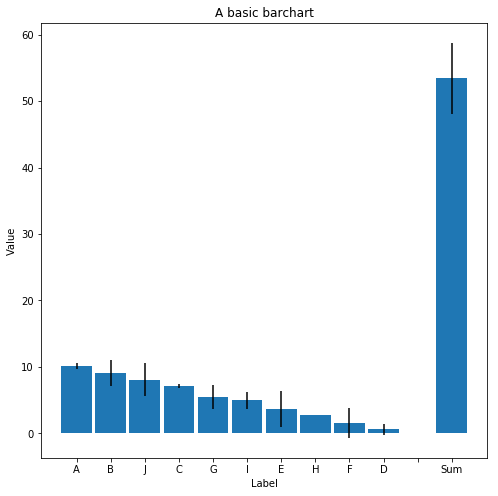

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(np.arange(len(df)), df['data'], yerr=df['error'], width=0.9)
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels(df['label'])
ax.set_xlabel('Label')
ax.set_ylabel('Value')
ax.set_title('A basic barchart');

## Stacked barchart 

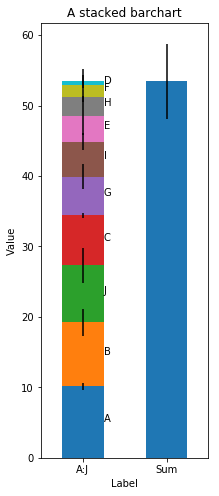

In [6]:
fig, ax = plt.subplots(figsize=(3, 8))
bottom = 0  # initialise bottom of stacked bars
for label in df['label'][:10]:  # loop through data and plot stacked bars
    ax.bar(0, df[df['label']==label]['data'], yerr=df[df['label']==label]['error'], width=1, bottom=bottom)
    ax.text(0.5, (2*bottom+float(df[df['label']==label]['data']))/2, label)
    bottom += float(df[df['label']==label]['data'])  # top of current bar is bottom of next bar
ax.bar(2, data_sum, yerr=combined_error, width=1)  # sum - final bar
ax.set_xlim([-1, 3])
ax.set_xticks([0, 2])
ax.set_xticklabels(['A:J', 'Sum',])
ax.set_xlabel('Label')
ax.set_ylabel('Value')
ax.set_title('A stacked barchart');

## A stacked-staggered barchart

In [7]:
bottom = np.zeros(12)  # array to hold information about bottom of bars
for label, i in zip(df['label'][0:9], range(9)):
    bottom[i+1] = bottom[i] + float(df[df['label']==label]['data'])  # bottoms as per stacked barchart above
bottom

array([  0.        ,  10.15790904,  19.24995125,  27.30483903,
        34.42914234,  39.93423981,  44.88479616,  48.56465109,
        51.27547554,  52.86443966,   0.        ,   0.        ])

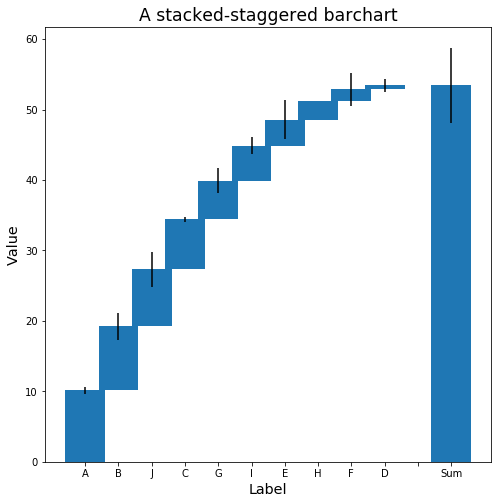

In [8]:
# Stacked-staggered barchart
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(np.arange(len(df)), df['data'], yerr=df['error'], width=1.2, bottom=bottom)
# Ticks etc
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels(df['label'])
ax.set_xlabel('Label', fontsize='x-large')
ax.set_ylabel('Value', fontsize='x-large')
ax.set_title('A stacked-staggered barchart', fontsize='xx-large')

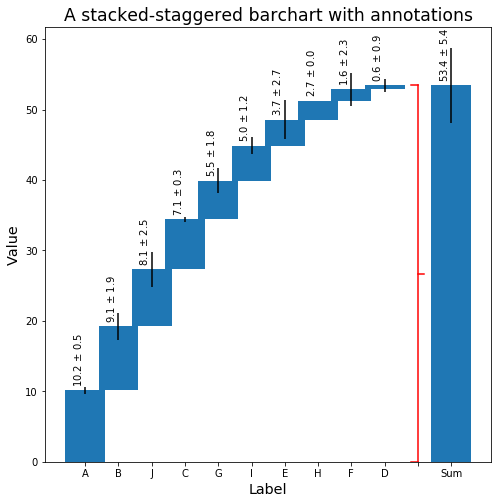

In [9]:
# Stacked-staggered barchart with annotations
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(np.arange(len(df)), df['data'], yerr=df['error'], width=1.2, bottom=bottom)
# Ticks etc
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels(df['label'])
ax.set_xlabel('Label', fontsize='x-large')
ax.set_ylabel('Value', fontsize='x-large')
ax.set_title('A stacked-staggered barchart with annotations', fontsize='xx-large')
# Brace
ax.plot([10, 10], [0, data_sum], c='r')
ax.plot([10, 10.2], [data_sum/2, data_sum/2], c='r')
ax.plot([9.8, 10], [0, 0], c='r')
ax.plot([9.8, 10], [data_sum, data_sum], c='r')
# Add values
for i in range(len(df)):
    if i != 10:
        text = r'{:.1f} $\pm$ {:.1f}'.format(float(df[df.index==i]['data']), float(df[df.index==i]['error']))
        ax.text(i-0.4, (bottom[i] + float(df[df.index==i]['data'])+0.5), text,
                rotation=90, verticalalignment='bottom')